Gift wrapping com classe Ponto

Nesta implementação foi criada uma classe Ponto que guarda as coordenadas x, y.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [2]:
class Ponto:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def print_ponto(self):
        print(self.x, self.y)


def print_pontos(pontos):
    for p in pontos:
        p.print_ponto()

def lista_pontos(S):
    """Transforma uma lista de pontos representados por tuplas em uma lista da classe Ponto.
    
    Entrada:
    S - uma lista de pontos representados por tuplas
    Saida:
    pontos - uma lista de elementos da classe Ponto
    """
    pontos = []
    for i in range(len(S)):
        pontos.append(Ponto(S[i][0], S[i][1]))
    return pontos

In [3]:
def ancora(pontos):
    """Encontra o ponto de menor y em um conjunto de pontos.

    Entrada:
    pontos - lista de elementos da classe Ponto
    Retorna:
    i0 - indice do Ponto de menor y
    """
    p0 = min(pontos, key = lambda ponto: ponto.y)
    i0 = pontos.index(p0)
    return i0

In [4]:
def orientacao(pi, pj , pk):
    """Encontra a orientacao dos segmentos de reta pi-pj-pk.
    
    Entrada:
    pi, pj, pk - pontos da classe Ponto
    Retorna:
    0 - se os pontos sao colineares
    1 - se estao em orientacao horaria
    2 - se estao em orientacao anti horaria
    """
    valor =  (float(pj.y - pi.y) * (pk.x - pj.x)) - (float(pj.x - pi.x) * (pk.y - pj.y))
    if valor > 0:
        # Sentido horario
        return 1
    elif valor < 0:
        # Sentido anti horario
        return 2
    else:
        # Colinear
        return 0

In [5]:
def envoltoria_convexa(pontos):
    """Encontra a envoltoria convexa de um conjunto de pontos.
    
    Entrada:
    pontos - lista de pontos da classe Ponto
    Saida:
    H - lista de pontos da classe Ponto representando a envoltoria convexa
    """

    S = pontos

    # Adicionar o ancora aa envoltoria
    i0 = ancora(S)
    H = [S[i0]]

    i = i0
    while True:
        # Procurar um ponto pk que esteja no sentido horario de todos os outros pontos
        k = (i + 1) % len(S) # k inicial eh o indice seguinte ao do ultimo ponto adicionado aa envoltoria

        # Para todos os pontos do conjunto de entrada
        for j in range(len(S)):
            # Se a orientacao pi-pk-pj eh no sentido horario, pj substitui pk como candidato aa envoltoria
            if orientacao(S[i], S[k], S[j]) == 1:
                k = j

        # k final eh o indice do ponto a ser incluido na envoltoria, que eh o ponto de referencia da proxima iteracao
        i = k
        
        # Interrompemos o algoritmo se chegamos ao primeiro ponto
        if i == i0: 
            break
        
        # Adicionamos o ponto candidato aa envoltoria
        H.append(S[i])
    
    return H

Testes:

In [6]:
'''Entrada'''

# S1 = [[2, 1], [15, 9], [4, 11], [3, 6], [12, 15], [8,10]]
rng = np.random.default_rng()
S1 = rng.random((10, 2))   # 10 random points in 2-D
S1 = np.floor(S1*10)

S = lista_pontos(S1)
print_pontos(S)

7.0 5.0
0.0 5.0
3.0 6.0
9.0 8.0
0.0 8.0
1.0 9.0
2.0 9.0
6.0 7.0
8.0 7.0
5.0 9.0


In [7]:
a = ancora(S)
S[a].print_ponto()

7.0 5.0


In [8]:
ori = orientacao(S[0], S[1], S[2])
ori

1

In [9]:
h = envoltoria_convexa(S)
print_pontos(h)

7.0 5.0
9.0 8.0
5.0 9.0
1.0 9.0
0.0 8.0
0.0 5.0


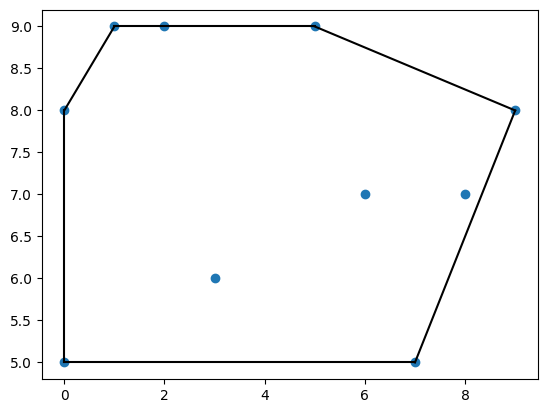

In [10]:
S2 = np.array(S1)
hull = ConvexHull(S2)


plt.plot(S2[:,0], S2[:,1], 'o')

for simplex in hull.simplices:

    plt.plot(S2[simplex, 0], S2[simplex, 1], 'k-')